In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns

Duplicate key in file PosixPath('/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family : IPAexGothic')


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv",header=None)

In [4]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [5]:
train.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


In [6]:
train.describe(include="O")

,datetime,week,name,remarks,event,weather,precipitation
count,207,207,207,21,14,207,207
unique,207,5,156,6,2,7,8
top,2014-3-31,水,タンドリーチキン,お楽しみメニュー,ママの会,快晴,--
freq,1,43,6,12,9,53,169


<AxesSubplot:>

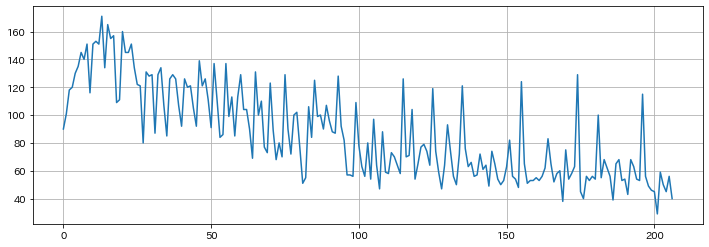

In [7]:
train["y"].plot(figsize=(12,4),grid=True)

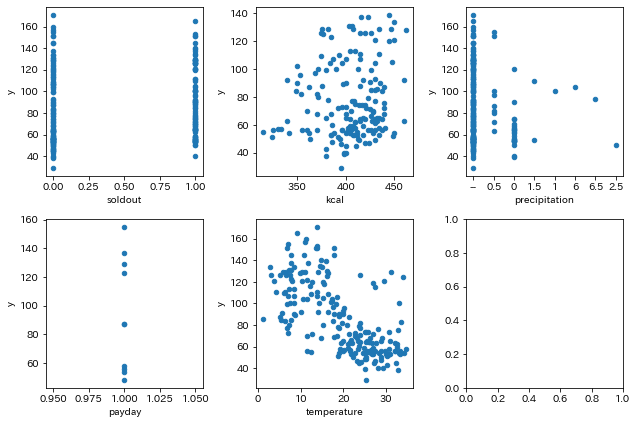

In [8]:
fig, ax = plt.subplots(2,3,figsize=(9,6))
train.plot.scatter(x="soldout", y="y", ax=ax[0][0])
train.plot.scatter(x="kcal", y="y", ax=ax[0][1])
train.plot.scatter(x="precipitation", y="y", ax=ax[0][2])
train.plot.scatter(x="payday", y="y", ax=ax[1][0])
train.plot.scatter(x="temperature", y="y", ax=ax[1][1])
plt.tight_layout()

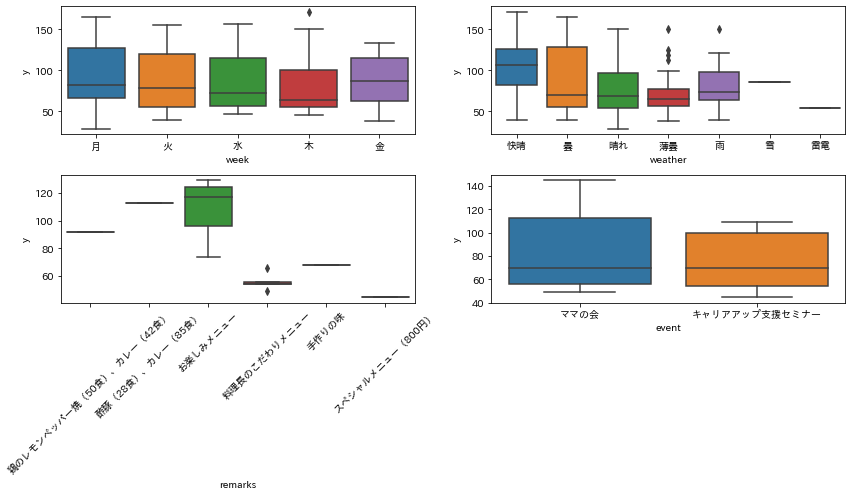

In [9]:
fig, ax = plt.subplots(2,2,figsize=(12,7))
sns.boxplot(x="week",y="y",data=train,ax=ax[0][0])
sns.boxplot(x="weather",y="y",data=train,ax=ax[0][1])
sns.boxplot(x="remarks",y="y",data=train,ax=ax[1][0])
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(),rotation=45)
sns.boxplot(x="event",y="y",data=train,ax=ax[1][1])
plt.tight_layout()

In [10]:
train["remarks"].value_counts()

お楽しみメニュー                    12
料理長のこだわりメニュー                 5
酢豚（28食）、カレー（85食）             1
スペシャルメニュー（800円）              1
鶏のレモンペッパー焼（50食）、カレー（42食）     1
手作りの味                        1
Name: remarks, dtype: int64

In [11]:
train. isnull().sum()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
dtype: int64

In [12]:
train["kcal"] = train["kcal"].fillna(train["kcal"].mean())
train["remarks"] = train["remarks"].fillna("なし")
train["event"] = train["event"].fillna("なし")
train["payday"] = train["payday"].fillna(0)

In [13]:
train. isnull().sum()

datetime         0
y                0
week             0
soldout          0
name             0
kcal             0
remarks          0
event            0
payday           0
weather          0
precipitation    0
temperature      0
dtype: int64

In [15]:
train.index = pd.to_datetime(train["datetime"])
train = train["2014-1-7":]

In [16]:
train

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,,
2014-01-07,2014-1-7,131,火,0,カレー入りソーセージカツ,404.000000,なし,なし,0.0,快晴,--,7.3
2014-01-08,2014-1-8,128,水,0,豚肉の生姜焼,462.000000,なし,なし,0.0,曇,--,9.8
2014-01-09,2014-1-9,129,木,1,鶏チリソース,435.000000,なし,なし,0.0,曇,--,10.9
2014-01-10,2014-1-10,87,金,0,手作りロースカツ,440.000000,なし,なし,1.0,快晴,--,5.1
2014-01-14,2014-1-14,129,火,1,鶏の照り焼きマスタード,376.000000,なし,なし,0.0,晴れ,--,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-24,2014-9-24,59,水,1,白身魚のマスタード焼き,408.000000,なし,なし,0.0,曇,0,24.8
2014-09-25,2014-9-25,50,木,0,牛カルビ焼き肉,394.000000,なし,なし,0.0,曇,0,25.4
2014-09-26,2014-9-26,45,金,0,ランチビュッフェ,404.409639,スペシャルメニュー（800円）,キャリアアップ支援セミナー,0.0,晴れ,--,27.1


In [17]:
trainX = pd.get_dummies(train[["temperature","remarks"]])
y=train["y"]

In [18]:
from sklearn.linear_model import LinearRegression as LR
model = LR()

In [19]:
model.fit(trainX,y)

LinearRegression()

In [20]:
print("傾き",model.coef_)
print("切片",model.intercept_)
print("決定計数",model.score(trainX,y))

傾き [ -2.29494388  42.14876969  -5.05222278 -20.68325276   6.906635
 -15.25342144   4.63079104 -12.69729875]
切片 127.87623194884698
決定計数 0.6086556313111962


In [21]:
train["y"]

datetime
2014-01-07    131
2014-01-08    128
2014-01-09    129
2014-01-10     87
2014-01-14    129
             ... 
2014-09-24     59
2014-09-25     50
2014-09-26     45
2014-09-29     56
2014-09-30     40
Name: y, Length: 179, dtype: int64

In [22]:
train = train.reset_index(drop=True)

In [23]:
train["y"]

0      131
1      128
2      129
3       87
4      129
      ... 
174     59
175     50
176     45
177     56
178     40
Name: y, Length: 179, dtype: int64

In [24]:
pred = model.predict(trainX)

In [25]:
from sklearn.metrics import mean_squared_error as MSE
print("RMSE",MSE(train["y"],pred)**0.5)

RMSE 17.178618148133573


In [27]:
 train.iloc[1:3,0:17]

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
1,2014-1-8,128,水,0,豚肉の生姜焼,462.0,なし,なし,0.0,曇,--,9.8
2,2014-1-9,129,木,1,鶏チリソース,435.0,なし,なし,0.0,曇,--,10.9


In [28]:
gcv = GridSearchCV(clf, parameters,cv=6, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv.fit(trainX,y)

NameError: name 'GridSearchCV' is not defined